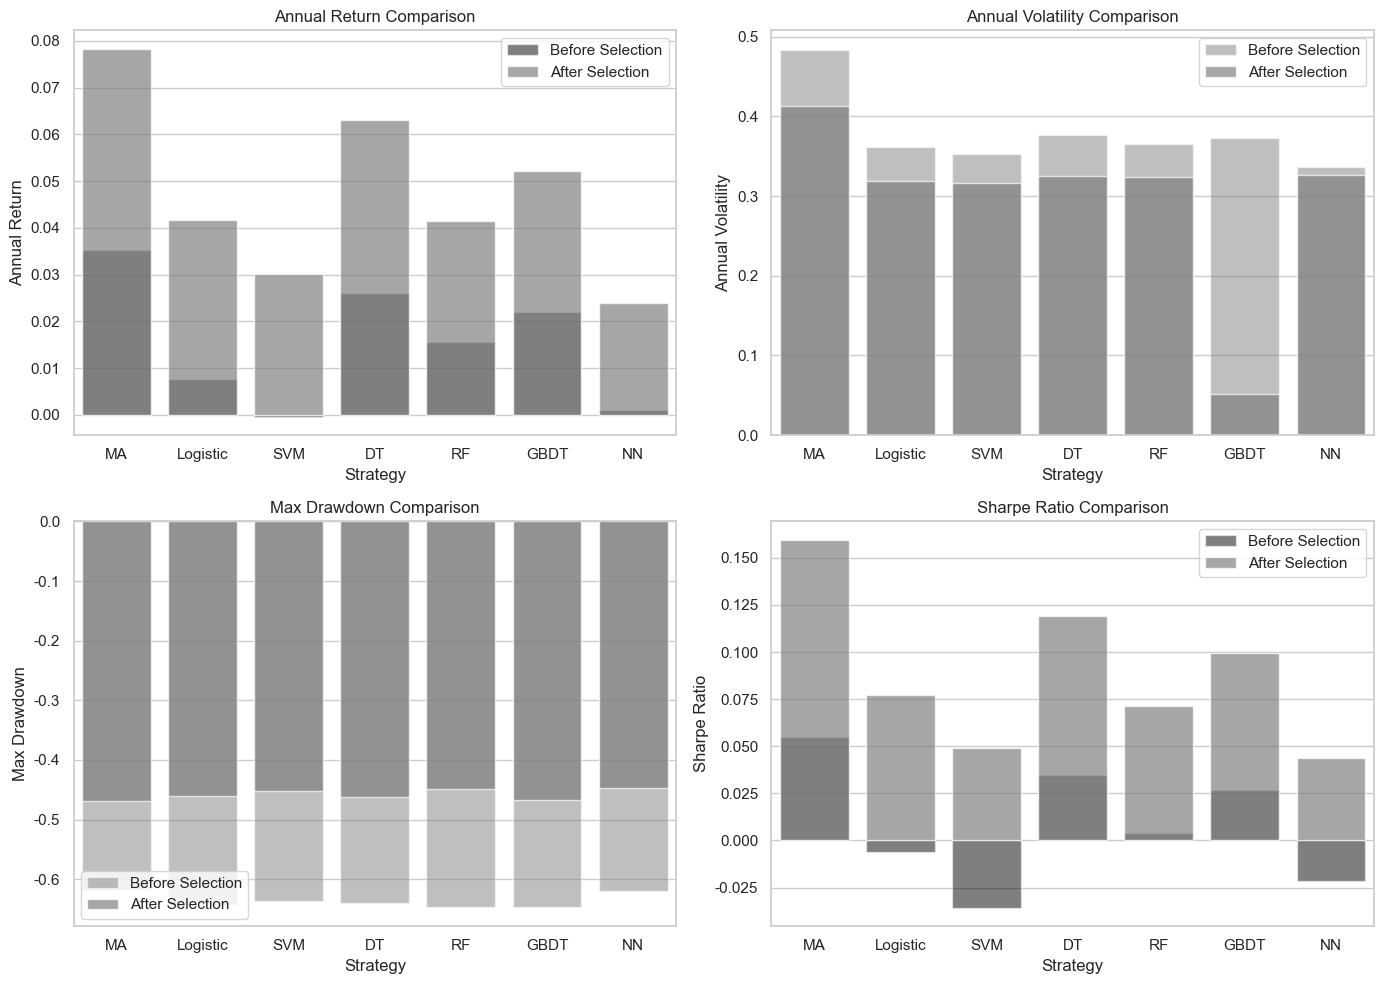

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display English fonts
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue

# Sample data
strategies = ["MA", "Logistic", "SVM", "DT", "RF", "GBDT", "NN"]

data_before = {
    "Strategy": strategies,
    "Annual Return": [0.035236, 0.007681, -0.000427, 0.026123, 0.015492, 0.021907, 0.000946],
    "Annual Volatility": [0.483591, 0.361476, 0.35279, 0.376729, 0.364736, 0.373341, 0.336676],
    "Max Drawdown": [-0.618284, -0.643353, -0.636014, -0.640223, -0.646014, -0.646574, -0.620613],
    "Sharpe Ratio": [0.05485, -0.006107, -0.035736, 0.034834, 0.004058, 0.026963, -0.021448]
}

data_after = {
    "Strategy": strategies,
    "Annual Return": [0.078283, 0.041656, 0.030043, 0.063096, 0.04152, 0.052069, 0.023898],
    "Annual Volatility": [0.412943, 0.318653, 0.315812, 0.324884, 0.323796, 0.052069, 0.327011],
    "Max Drawdown": [-0.468284, -0.461202, -0.4528, -0.462432, -0.449455, -0.466975, -0.446911],
    "Sharpe Ratio": [0.159608, 0.076984, 0.049164, 0.119241, 0.071535, 0.099463, 0.04386]
}

df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colors for print-friendly visuals
before_color = "black"  # Black bars for 'Before Selection'
after_color = "gray"  # Gray bars for 'After Selection'

# Annual Return Comparison
sns.barplot(x="Strategy", y="Annual Return", data=df_before, color=before_color, alpha=0.5, label="Before Selection", ax=axes[0, 0])
sns.barplot(x="Strategy", y="Annual Return", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[0, 0])
axes[0, 0].set_title("Annual Return Comparison")
axes[0, 0].set_xticks(range(len(strategies)))
axes[0, 0].set_xticklabels(strategies)
axes[0, 0].legend()

# Annual Volatility Comparison
sns.barplot(x="Strategy", y="Annual Volatility", data=df_before, color=after_color, alpha=0.5, label="Before Selection", ax=axes[0, 1])
sns.barplot(x="Strategy", y="Annual Volatility", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[0, 1])
axes[0, 1].set_title("Annual Volatility Comparison")
axes[0, 1].set_xticks(range(len(strategies)))
axes[0, 1].set_xticklabels(strategies)
axes[0, 1].legend()

# Max Drawdown Comparison
sns.barplot(x="Strategy", y="Max Drawdown", data=df_before, color=after_color, alpha=0.5, label="Before Selection", ax=axes[1, 0])
sns.barplot(x="Strategy", y="Max Drawdown", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[1, 0])
axes[1, 0].set_title("Max Drawdown Comparison")
axes[1, 0].set_xticks(range(len(strategies)))
axes[1, 0].set_xticklabels(strategies)
axes[1, 0].legend()

# Sharpe Ratio Comparison
sns.barplot(x="Strategy", y="Sharpe Ratio", data=df_before, color=before_color, alpha=0.5, label="Before Selection", ax=axes[1, 1])
sns.barplot(x="Strategy", y="Sharpe Ratio", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[1, 1])
axes[1, 1].set_title("Sharpe Ratio Comparison")
axes[1, 1].set_xticks(range(len(strategies)))
axes[1, 1].set_xticklabels(strategies)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [45]:
import numpy as np
import scipy.stats as stats

# 将 before 和 after 数据展开成一维向量
before_values = np.concatenate([
    data_before["Annual Return"],
    data_before["Annual Volatility"],
    data_before["Max Drawdown"],
    data_before["Sharpe Ratio"]
])

after_values = np.concatenate([
    data_after["Annual Return"],
    data_after["Annual Volatility"],
    data_after["Max Drawdown"],
    data_after["Sharpe Ratio"]
])

# 执行配对 t 检验
t_stat, p_value_t = stats.ttest_rel(after_values, before_values, alternative='greater')

# 执行 Wilcoxon 符号秩检验
w_stat, p_value_w = stats.wilcoxon(after_values, before_values, alternative='greater')

# 输出结果
print(f"Paired t-test: t-stat = {t_stat:.4f}, p-value = {p_value_t:.4f}")
print(f"Wilcoxon signed-rank test: W-stat = {w_stat:.4f}, p-value = {p_value_w:.4f}")

# 判断是否显著大于
alpha = 0.05
if p_value_t < alpha:
    print("配对 t 检验结果：before 显著大于 after")
else:
    print("配对 t 检验结果：before 不显著大于 after")

if p_value_w < alpha:
    print("Wilcoxon 检验结果：before 显著大于 after")
else:
    print("Wilcoxon 检验结果：before 不显著大于 after")


Paired t-test: t-stat = 1.8401, p-value = 0.0428
Wilcoxon signed-rank test: W-stat = 100.0000, p-value = 0.0523
配对 t 检验结果：before 显著大于 after
Wilcoxon 检验结果：before 不显著大于 after


In [46]:
import numpy as np
import scipy.stats as stats

# 设定显著性水平
alpha = 0.05

# 定义指标名称
metrics = ["Annual Return", "Annual Volatility", "Max Drawdown", "Sharpe Ratio"]

# 遍历每个指标，分别进行统计检验
for metric in metrics:
    before_values = np.array(data_before[metric])
    after_values = np.array(data_after[metric])

    # 配对 t 检验（假设数据服从正态分布）
    t_stat, p_value_t = stats.ttest_rel(after_values, before_values, alternative='greater')

    # Wilcoxon 符号秩检验（非参数检验）
    try:
        w_stat, p_value_w = stats.wilcoxon(after_values, before_values, alternative='greater')
    except ValueError:
        p_value_w = 1  # Wilcoxon 可能在无变化的数据上报错，此时 p 设为 1

    # 输出结果
    print(f"指标: {metric}")
    print(f"  Paired t-test: t-stat = {t_stat:.4f}, p-value = {p_value_t:.4f}")
    print(f"  Wilcoxon signed-rank test: W-stat = {w_stat:.4f}, p-value = {p_value_w:.4f}")

    # 判断显著性
    if p_value_t < alpha:
        print("  配对 t 检验：before 显著大于 after")
    else:
        print("  配对 t 检验：before 不显著大于 after")

    if p_value_w < alpha:
        print("  Wilcoxon 检验：before 显著大于 after")
    else:
        print("  Wilcoxon 检验：before 不显著大于 after")

    print("-" * 50)


指标: Annual Return
  Paired t-test: t-stat = 0.5577, p-value = 0.3080
  Wilcoxon signed-rank test: W-stat = 7.0000, p-value = 0.3125
  配对 t 检验：before 不显著大于 after
  Wilcoxon 检验：before 不显著大于 after
--------------------------------------------------
指标: Annual Volatility
  Paired t-test: t-stat = -1.9213, p-value = 0.9248
  Wilcoxon signed-rank test: W-stat = 1.0000, p-value = 0.9375
  配对 t 检验：before 不显著大于 after
  Wilcoxon 检验：before 不显著大于 after
--------------------------------------------------
指标: Max Drawdown
  Paired t-test: t-stat = 0.4484, p-value = 0.3421
  Wilcoxon signed-rank test: W-stat = 7.0000, p-value = 0.3125
  配对 t 检验：before 不显著大于 after
  Wilcoxon 检验：before 不显著大于 after
--------------------------------------------------
指标: Sharpe Ratio
  Paired t-test: t-stat = 2.6102, p-value = 0.0398
  Wilcoxon signed-rank test: W-stat = 10.0000, p-value = 0.0625
  配对 t 检验：before 显著大于 after
  Wilcoxon 检验：before 不显著大于 after
--------------------------------------------------


C:\Users\swt52\AppData\Local\Temp\ipykernel_16788\2608391620.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(strategies, rotation=30)
C:\Users\swt52\AppData\Local\Temp\ipykernel_16788\2608391620.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(strategies, rotation=30)
C:\Users\swt52\AppData\Local\Temp\ipykernel_16788\2608391620.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(strategies, rotation=30)
C:\Users\swt52\AppData\Local\Temp\ipykernel_16788\2608391620.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(strategies, rotation=30)


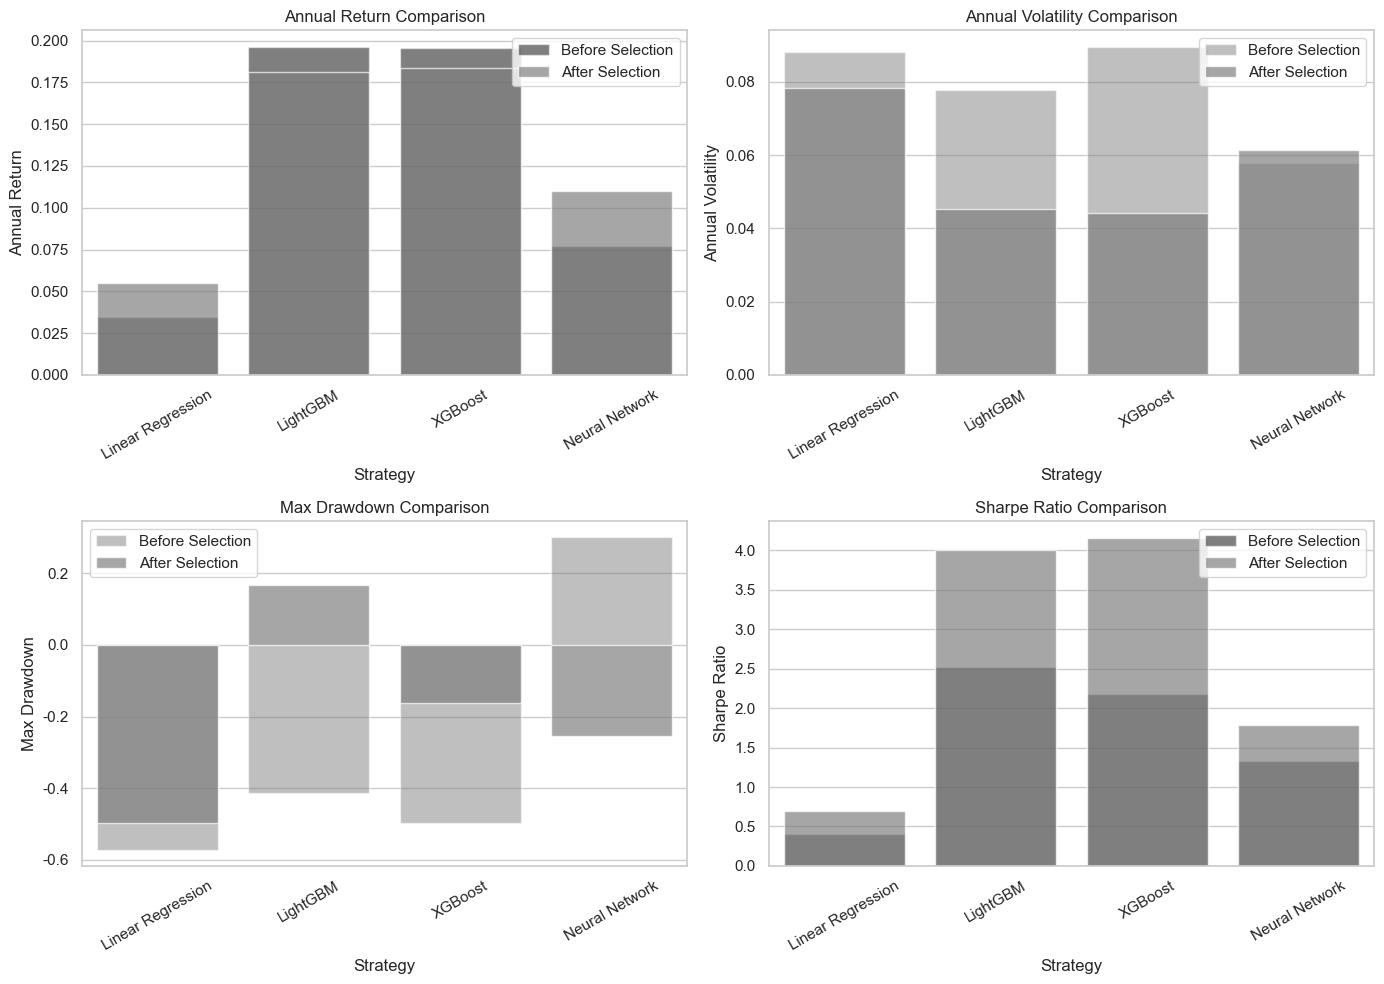

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display English fonts
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False  # Fix negative sign display issue

# Adjusted order of strategies
strategies = ["Linear Regression", "LightGBM", "XGBoost", "Neural Network"]

data_before = {
    "Strategy": strategies,
    "Annual Return": [0.0349, 0.1963, 0.1956, 0.0769],
    "Annual Volatility": [0.0883, 0.0778, 0.0896, 0.0579],
    "Max Drawdown": [-0.5731, -0.4135, -0.498, 0.3008],
    "Sharpe Ratio": [0.4, 2.52, 2.18, 1.33]
}

data_after = {
    "Strategy": strategies,
    "Annual Return": [0.0549, 0.1815, 0.1838, 0.1098],
    "Annual Volatility": [0.0784, 0.0454, 0.0442, 0.0613],
    "Max Drawdown": [-0.4983, 0.168, -0.1611, -0.254],
    "Sharpe Ratio": [0.7, 4.0, 4.16, 1.79]
}

df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colors for print-friendly visuals
before_color = "black"  # Black bars for 'Before Selection'
after_color = "gray"  # Gray bars for 'After Selection'

# Annual Return Comparison
sns.barplot(x="Strategy", y="Annual Return", data=df_before, color=before_color, alpha=0.5, label="Before Selection", ax=axes[0, 0])
sns.barplot(x="Strategy", y="Annual Return", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[0, 0])
axes[0, 0].set_title("Annual Return Comparison")
axes[0, 0].set_xticklabels(strategies, rotation=30)
axes[0, 0].legend()

# Annual Volatility Comparison
sns.barplot(x="Strategy", y="Annual Volatility", data=df_before, color=after_color, alpha=0.5, label="Before Selection", ax=axes[0, 1])
sns.barplot(x="Strategy", y="Annual Volatility", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[0, 1])
axes[0, 1].set_title("Annual Volatility Comparison")
axes[0, 1].set_xticklabels(strategies, rotation=30)
axes[0, 1].legend()

# Max Drawdown Comparison
sns.barplot(x="Strategy", y="Max Drawdown", data=df_before, color=after_color, alpha=0.5, label="Before Selection", ax=axes[1, 0])
sns.barplot(x="Strategy", y="Max Drawdown", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[1, 0])
axes[1, 0].set_title("Max Drawdown Comparison")
axes[1, 0].set_xticklabels(strategies, rotation=30)
axes[1, 0].legend()

# Sharpe Ratio Comparison
sns.barplot(x="Strategy", y="Sharpe Ratio", data=df_before, color=before_color, alpha=0.5, label="Before Selection", ax=axes[1, 1])
sns.barplot(x="Strategy", y="Sharpe Ratio", data=df_after, color=after_color, alpha=0.7, label="After Selection", ax=axes[1, 1])
axes[1, 1].set_title("Sharpe Ratio Comparison")
axes[1, 1].set_xticklabels(strategies, rotation=30)
axes[1, 1].legend()

plt.tight_layout()
plt.show()
